**Title: Breast Cancer Classification Model**


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1. Load the Dataset
print("Loading Breast Cancer Dataset...")
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

Loading Breast Cancer Dataset...


In [4]:
print("\nDataset Shape:", X.shape)
print("\nFeature Names:")
print(data.feature_names)
print("\nTarget Names:", data.target_names)


Dataset Shape: (569, 30)

Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']


In [5]:
# 2. Basic Data Analysis
print("\nBasic Data Analysis:")
print("\nFeature Statistics:")
print(X.describe())


Basic Data Analysis:

Feature Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380       

In [6]:
# Check for missing values
print("\nMissing Values:")
print(X.isnull().sum())


Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [7]:
# 3. Exploratory Data Analysis
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


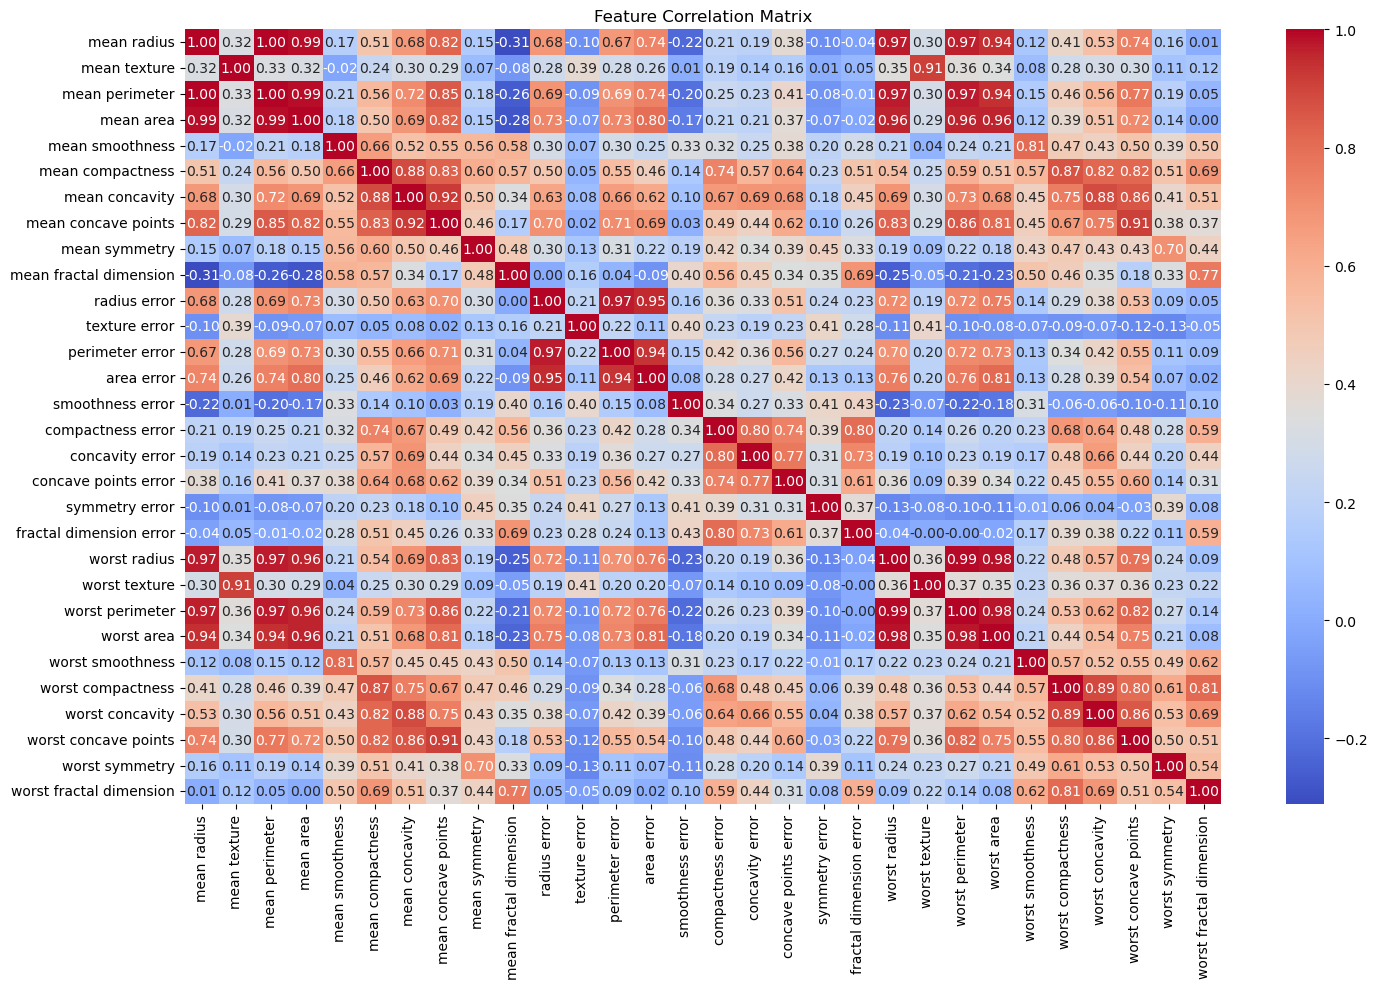

In [8]:
# Plot correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

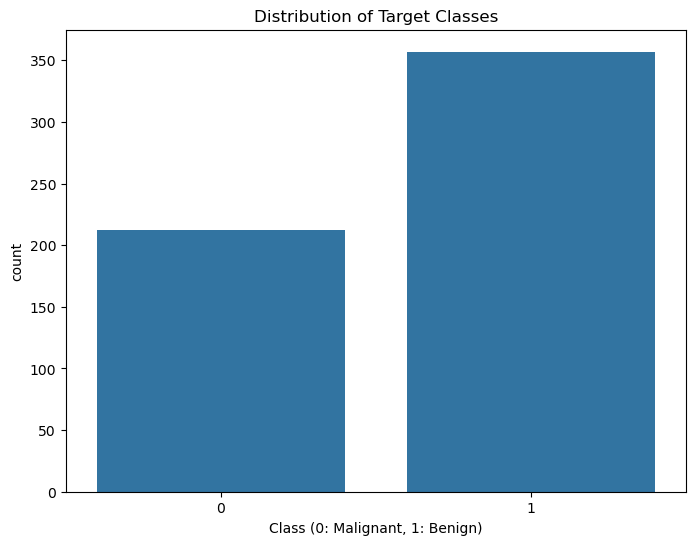

In [9]:
# Distribution of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Classes')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.show()

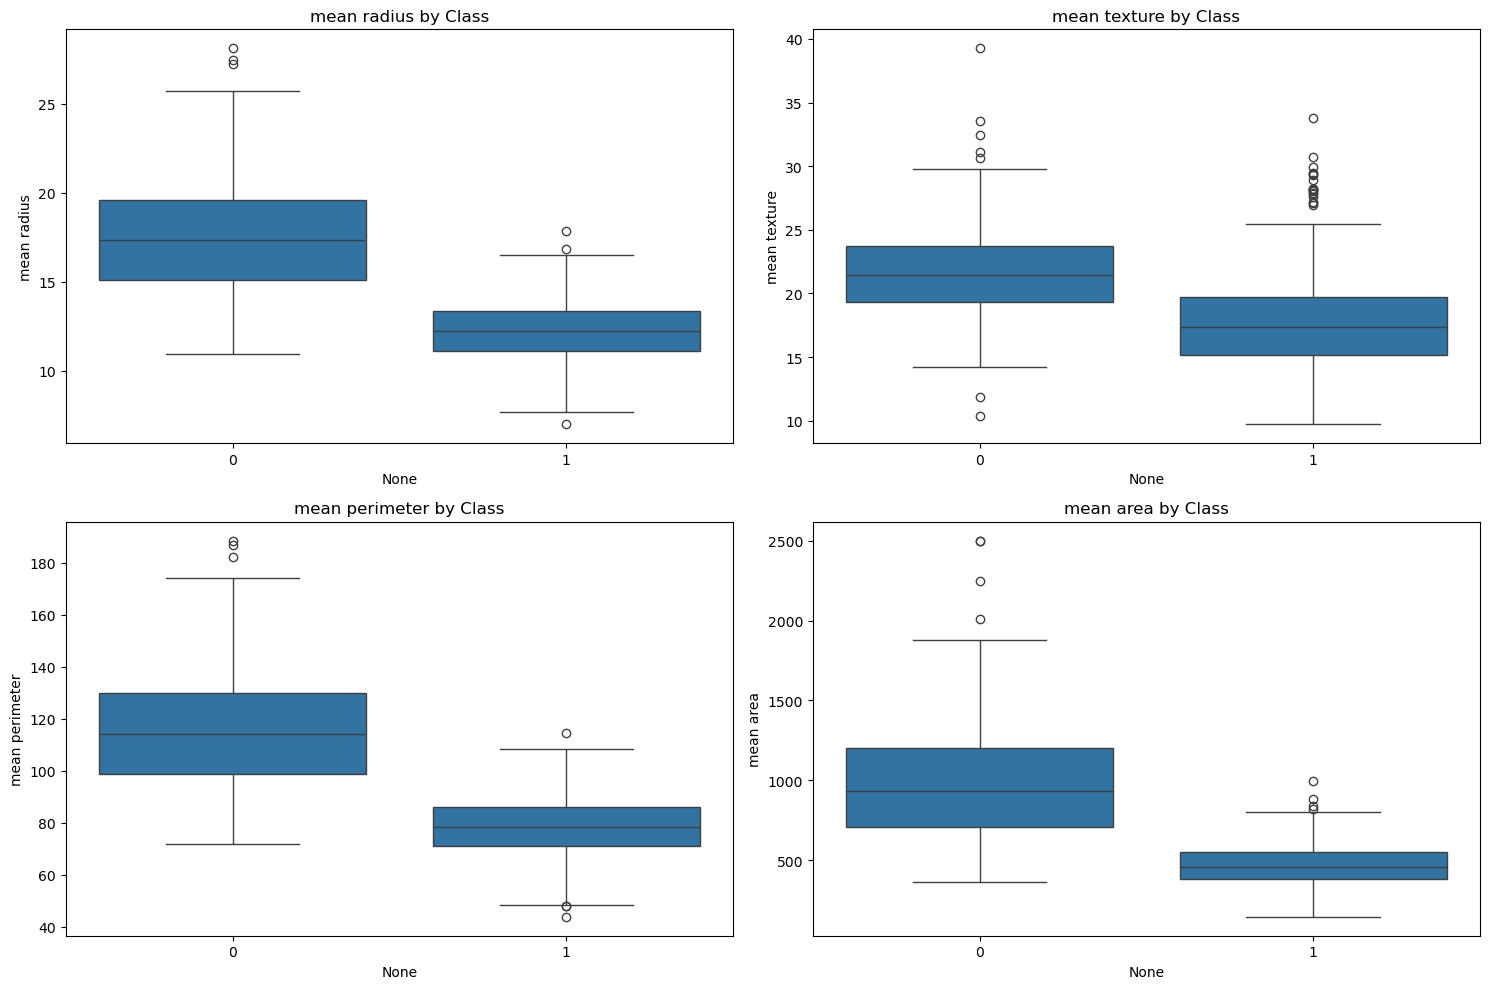

In [10]:
# Box plots for key features
plt.figure(figsize=(15, 10))
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=y, y=X[feature])
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()

In [11]:
# 4. Data Preprocessing
print("\nPreprocessing Data...")


Preprocessing Data...


In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# 5. Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [15]:
# Dictionary to store results
results = {}
best_accuracy = 0
best_model_name = ''


Training and Evaluating Models...

Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.9737
Cross-validation mean accuracy: 0.9736 (+/- 0.0357)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[41  2]
 [ 1 70]]


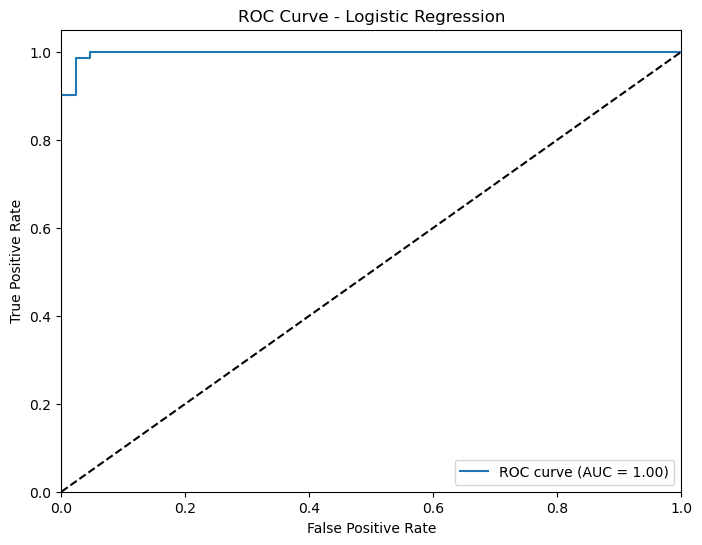


Training SVM...
SVM Results:
Accuracy: 0.9825
Cross-validation mean accuracy: 0.9758 (+/- 0.0256)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
[[41  2]
 [ 0 71]]


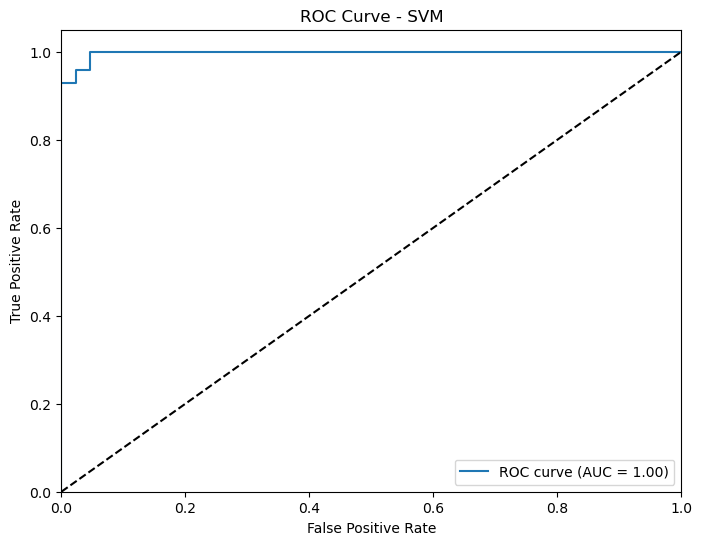


Training Decision Tree...
Decision Tree Results:
Accuracy: 0.9298
Cross-validation mean accuracy: 0.9165 (+/- 0.0357)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


Confusion Matrix:
[[39  4]
 [ 4 67]]


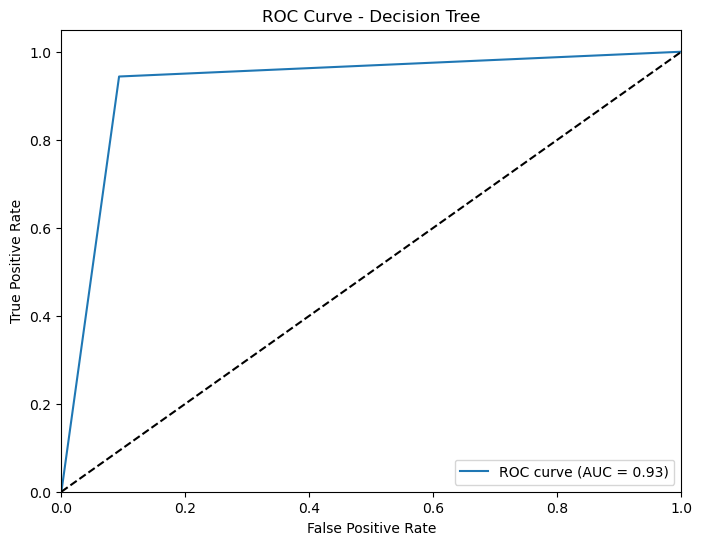


Training Random Forest...
Random Forest Results:
Accuracy: 0.9649
Cross-validation mean accuracy: 0.9560 (+/- 0.0368)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 1 70]]


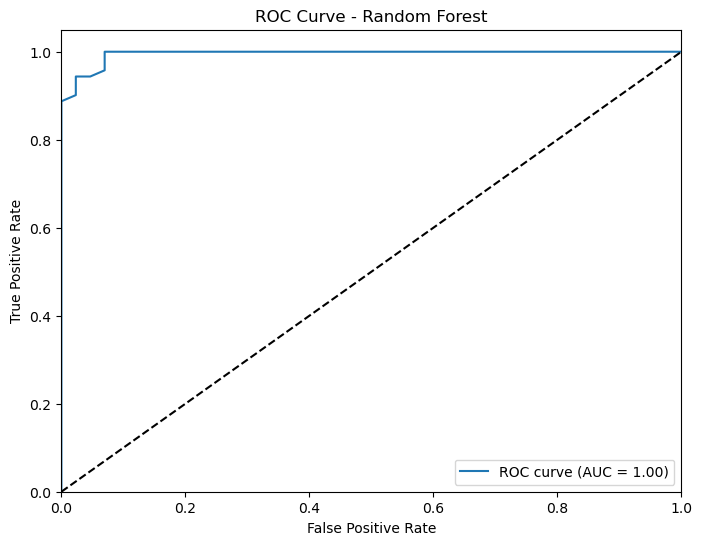


Training Gradient Boosting...
Gradient Boosting Results:
Accuracy: 0.9561
Cross-validation mean accuracy: 0.9538 (+/- 0.0292)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 2 69]]


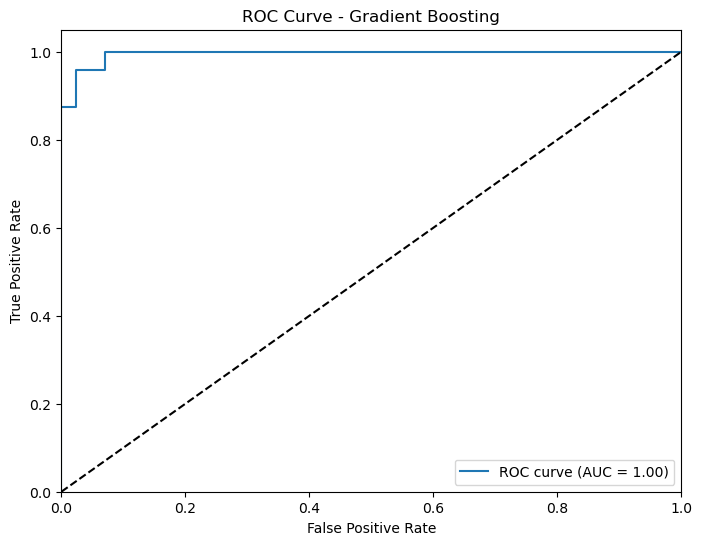

In [16]:
print("\nTraining and Evaluating Models...")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    # Update best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
    
    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Plot ROC curve
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

In [17]:
# 6. Model Comparison
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
cv_means = [results[name]['cv_mean'] for name in model_names]

In [18]:
# Plot model comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.35

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 5 artists>

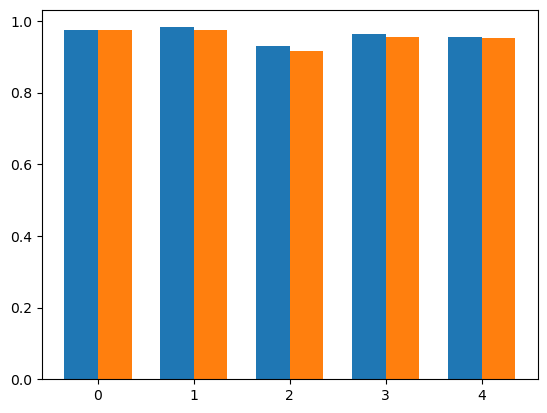

In [19]:
plt.bar(x - width/2, accuracies, width, label='Test Accuracy')
plt.bar(x + width/2, cv_means, width, label='CV Mean Accuracy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


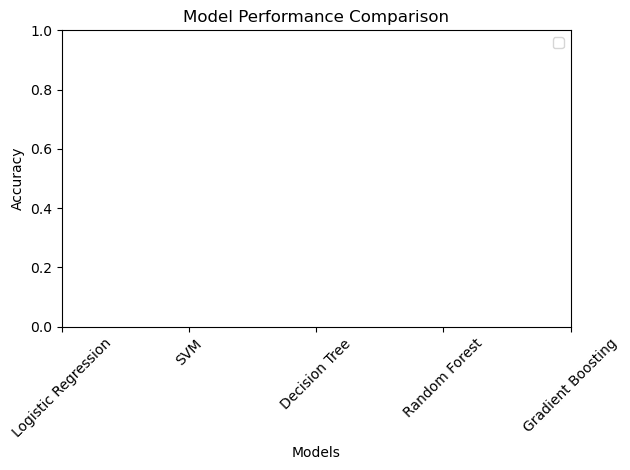

In [20]:
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# 7. Feature Importance Analysis
best_model = results[best_model_name]['model']

In [22]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': data.feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title(f'Top 15 Most Important Features ({best_model_name})')
    plt.tight_layout()
    plt.show()

In [23]:
# 8. Testing with Custom Cases
print("\n=== Testing with Custom Cases ===")


=== Testing with Custom Cases ===


In [24]:
# Create sample cases based on typical feature ranges
custom_cases = pd.DataFrame([
    # Case 1: Typical benign case
    X.mean() - X.std(),
    # Case 2: Typical malignant case
    X.mean() + X.std(),
    # Case 3: Borderline case
    X.mean()
])

In [25]:
# Scale the custom cases
custom_cases_scaled = scaler.transform(custom_cases)

In [26]:
# Make predictions
custom_predictions = best_model.predict(custom_cases_scaled)
custom_probabilities = best_model.predict_proba(custom_cases_scaled)

In [27]:
# Print results
case_types = ['Likely Benign', 'Likely Malignant', 'Borderline']
print(f"\nPredictions using best model ({best_model_name}):")
for i in range(len(custom_cases)):
    print(f"\nCase {i+1} ({case_types[i]}):")
    print(f"Prediction: {'Benign' if custom_predictions[i] == 1 else 'Malignant'}")
    print(f"Probability of Benign: {custom_probabilities[i][1]:.2%}")


Predictions using best model (SVM):

Case 1 (Likely Benign):
Prediction: Benign
Probability of Benign: 100.00%

Case 2 (Likely Malignant):
Prediction: Malignant
Probability of Benign: 0.02%

Case 3 (Borderline):
Prediction: Benign
Probability of Benign: 88.14%


In [28]:
# 9. Save the best model
import joblib
joblib.dump(best_model, 'best_breast_cancer_model.joblib')
print("\nBest model saved as 'best_breast_cancer_model.joblib'")


Best model saved as 'best_breast_cancer_model.joblib'


In [29]:
# Print final conclusions
print("\n=== Final Conclusions ===")
print(f"Best performing model: {best_model_name}")
print(f"Best model accuracy: {best_accuracy:.4f}")
print(f"Cross-validation accuracy: {results[best_model_name]['cv_mean']:.4f} "
      f"(±{results[best_model_name]['cv_std']*2:.4f})")


=== Final Conclusions ===
Best performing model: SVM
Best model accuracy: 0.9825
Cross-validation accuracy: 0.9758 (±0.0256)
